In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import data
null_data = np.array(pd.read_pickle('data/null_model/unfiltered/repeat_data_2000.pkl'))
# actual_data = [2231, 78, 48, 6]
actual_data = [12597, 5381, 2471, 1104]
print(null_data.shape)

(4, 2000)


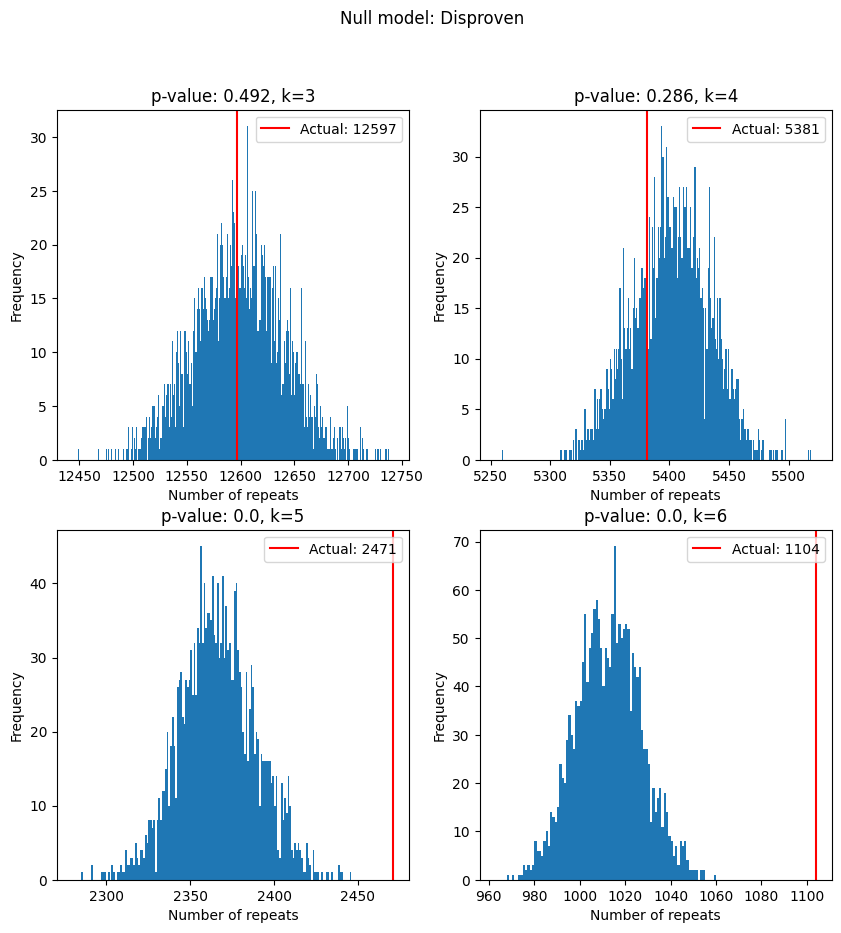

In [5]:
values, p_values = [], []
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    axs[i//2, i%2].hist(null_data[i, :], bins=range(min(null_data[i, :]) - 5, max(null_data[i, :])+5+1))
    axs[i//2, i%2].axvline(x=actual_data[i], color='r', label=f'Actual: {actual_data[i]}')

    null_mean = np.mean(null_data[i, :])
    
    if actual_data[i] < null_mean:
        p_value = np.sum(null_data[i, :] <= actual_data[i])/len(null_data[i, :])
    else:
        p_value = np.sum(null_data[i, :] >= actual_data[i])/len(null_data[i, :])
    
    axs[i//2, i%2].set_title(f'p-value: {p_value}, k={i+3}')
    axs[i//2, i%2].set_xlabel('Number of repeats')
    axs[i//2, i%2].set_ylabel('Frequency')
    axs[i//2, i%2].legend()

    values.append(actual_data[i])
    p_values.append(p_value)
fig.suptitle('Null model: Disproven')#high diversity (>50%)
# plt.savefig('plots/null_model/high_diversity_p_value.png')
plt.show()